<a href="https://colab.research.google.com/github/jjs5609/DS-Unit-1-Sprint-1-Build/blob/master/James_Song_Sprint1_Build_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [0]:
import pandas as pd
import numpy as np
import pandas_profiling
import plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

### Data Imports

In [0]:
column_headers = ['win', 'first_blood', 'first_tower', 'first_inhib', 
                  'first_baron', 'first_dragon', 'first_herald', 
                  'tower_kills_team_1', 'inhib_kills_team_1', 
                  'baron_kills_team_1', 'dragon_kills_team_1', 
                  'vilemaw_kills_team_1', 'herald_kills_team_1', 
                  'tower_kills_team_2', 'inhib_kills_team_2', 
                  'baron_kills_team_2', 'dragon_kills_team_2', 
                  'vilemaw_kills_team_2', 'herald_kills_team_2', 
                  'kills_top_team_1', 'assists_top_team_1', 
                  'deaths_top_team_1', 'gold_earned_20_top_team_1', 
                  'cs_20_top_team_1', 'xp_20_top_team_1', 
                  'dmg_taken_20_top_team_1', 'kills_mid_team_1', 
                  'assists_mid_team_1', 'deaths_mid_team_1', 
                  'gold_earned_20_mid_team_1', 'cs_20_mid_team_1', 
                  'xp_20_mid_team_1', 'dmg_taken_20_mid_team_1', 
                  'kills_jungle_team_1','assists_jungle_team_1', 
                  'deaths_jungle_team_1', 'gold_earned_20_jungle_team_1', 
                  'cs_20_jungle_team_1', 'xp_20_jungle_team_1', 
                  'dmg_taken_20_jungle_team_1', 'kills_supp_team_1', 
                  'assists_supp_team_1', 'deaths_supp_team_1', 
                  'gold_earned_20_supp_team_1', 'cs_20_supp_team_1', 
                  'xp_20_supp_team_1', 'dmg_taken_20_supp_team_1', 
                  'kills_bot_team_1', 'assists_bot_team_1', 'deaths_bot_team_1', 
                  'gold_earned_20_bot_team_1', 'cs_20_bot_team_1', 
                  'xp_20_bot_team_1', 'dmg_taken_20_bot_team_1', 
                  'kills_top_team_2', 'assists_top_team_2', 'deaths_top_team_2',
                  'gold_earned_20_top_team_2', 'cs_20_top_team_2', 
                  'xp_20_top_team_2', 'dmg_taken_20_top_team_2', 
                  'kills_mid_team_2', 'assists_mid_team_2', 'deaths_mid_team_2', 
                  'gold_earned_20_mid_team_2', 'cs_20_mid_team_2', 
                  'xp_20_mid_team_2', 'dmg_taken_20_mid_team_2', 
                  'kills_jungle_team_2', 'assists_jungle_team_2', 
                  'deaths_jungle_team_2', 'gold_earned_20_jungle_team_2', 
                  'cs_20_jungle_team_2', 'xp_20_jungle_team_2', 
                  'dmg_taken_20_jungle_team_2', 'kills_supp_team_2', 
                  'assists_supp_team_2', 'deaths_supp_team_2', 
                  'gold_earned_20_supp_team_2', 'cs_20_supp_team_2', 
                  'xp_20_supp_team_2', 'dmg_taken_20_supp_team_2', 
                  'kills_bot_team_2', 'assists_bot_team_2', 'deaths_bot_team_2', 
                  'gold_earned_20_bot_team_2', 'cs_20_bot_team_2', 
                  'xp_20_bot_team_2', 'dmg_taken_20_bot_team_2']

In [0]:
# reading in the first of two data frames
challenger = pd.read_csv('https://raw.githubusercontent.com/jjs5609/DS-Unit-1-Sprint-1-Build/master/challenger.csv', header=0, names=column_headers)
challenger.head()

win  first_blood  ...  xp_20_bot_team_2  dmg_taken_20_bot_team_2
0    1            1  ...             408.5                    874.2
1    1            1  ...             363.9                    822.8
2    1            1  ...             363.9                    822.8
3    2            1  ...             387.1                    421.9
4    2            1  ...             387.1                    421.9

[5 rows x 89 columns]

In [0]:
# reading in the second of two data frames
low_elo = pd.read_csv('https://raw.githubusercontent.com/jjs5609/DS-Unit-1-Sprint-1-Build/master/others_tiers.csv', header=0, names=column_headers)
low_elo.head()

win  first_blood  ...  xp_20_bot_team_2  dmg_taken_20_bot_team_2
0    1            1  ...             358.1                    596.5
1    1            1  ...             358.1                    596.5
2    1            1  ...             482.1                    663.2
3    1            2  ...             419.4                    621.6
4    1            1  ...             352.6                    465.1

[5 rows x 89 columns]

### Cleaning the Data Sets

In [0]:
# creating subsets of the winning teams so I display only the data for
# each winning team
team_1_c = challenger[challenger['win'] == 1]
team_2_c = challenger[challenger['win'] == 2]
team_1_le = low_elo[low_elo['win'] == 1]
team_2_le = low_elo[low_elo['win'] == 2]

In [0]:
team_1_c.head()

win  first_blood  ...  xp_20_bot_team_2  dmg_taken_20_bot_team_2
0    1            1  ...             408.5                    874.2
1    1            1  ...             363.9                    822.8
2    1            1  ...             363.9                    822.8
8    1            1  ...             447.9                    788.5
9    1            1  ...             516.5                    192.7

[5 rows x 89 columns]

In [0]:
team_2_c.head()

win  first_blood  ...  xp_20_bot_team_2  dmg_taken_20_bot_team_2
3    2            1  ...             387.1                    421.9
4    2            1  ...             387.1                    421.9
5    2            2  ...             412.7                    608.4
6    2            2  ...             412.7                    608.4
7    2            2  ...             412.7                    608.4

[5 rows x 89 columns]

In [0]:
team_1_le.head()

win  first_blood  ...  xp_20_bot_team_2  dmg_taken_20_bot_team_2
0    1            1  ...             358.1                    596.5
1    1            1  ...             358.1                    596.5
2    1            1  ...             482.1                    663.2
3    1            2  ...             419.4                    621.6
4    1            1  ...             352.6                    465.1

[5 rows x 89 columns]

In [0]:
team_2_le.head()

win  first_blood  ...  xp_20_bot_team_2  dmg_taken_20_bot_team_2
5     2            2  ...             503.0                   1029.7
6     2            2  ...             413.9                    649.5
7     2            2  ...             413.9                    649.5
9     2            2  ...             365.2                    655.4
12    2            2  ...             413.9                    649.5

[5 rows x 89 columns]

In [0]:
# isolating the player contributions on the winning teams
# cp represents carry potential
team_1_c_cp = team_1_c[['kills_top_team_1', 'assists_top_team_1', 
                       'deaths_top_team_1', 'gold_earned_20_top_team_1', 
                       'cs_20_top_team_1', 'xp_20_top_team_1', 
                       'kills_mid_team_1', 'assists_mid_team_1', 
                       'deaths_mid_team_1', 'gold_earned_20_mid_team_1', 
                       'cs_20_mid_team_1', 'xp_20_mid_team_1', 
                       'kills_jungle_team_1','assists_jungle_team_1', 
                       'deaths_jungle_team_1', 'gold_earned_20_jungle_team_1', 
                       'cs_20_jungle_team_1', 'xp_20_jungle_team_1', 
                       'kills_supp_team_1', 'assists_supp_team_1', 
                       'deaths_supp_team_1', 'gold_earned_20_supp_team_1', 
                       'cs_20_supp_team_1', 'xp_20_supp_team_1', 
                       'kills_bot_team_1', 'assists_bot_team_1', 
                       'deaths_bot_team_1', 'gold_earned_20_bot_team_1', 
                       'cs_20_bot_team_1', 'xp_20_bot_team_1']]

team_1_c_cp.shape

(164, 30)

In [0]:
team_2_c_cp = team_2_c[['kills_top_team_2', 'assists_top_team_2', 
                       'deaths_top_team_2', 'gold_earned_20_top_team_2', 
                       'cs_20_top_team_2', 'xp_20_top_team_2', 
                       'kills_mid_team_2', 'assists_mid_team_2', 
                       'deaths_mid_team_2', 'gold_earned_20_mid_team_2', 
                       'cs_20_mid_team_2', 'xp_20_mid_team_2', 
                       'kills_jungle_team_2','assists_jungle_team_2', 
                       'deaths_jungle_team_2', 'gold_earned_20_jungle_team_2', 
                       'cs_20_jungle_team_2', 'xp_20_jungle_team_2', 
                       'kills_supp_team_2', 'assists_supp_team_2', 
                       'deaths_supp_team_2', 'gold_earned_20_supp_team_2', 
                       'cs_20_supp_team_2', 'xp_20_supp_team_2', 
                       'kills_bot_team_2', 'assists_bot_team_2', 
                       'deaths_bot_team_2', 'gold_earned_20_bot_team_2', 
                       'cs_20_bot_team_2', 'xp_20_bot_team_2']]

team_2_c_cp.shape

(211, 30)

In [0]:
team_1_le_cp = team_1_le[['kills_top_team_1', 'assists_top_team_1', 
                       'deaths_top_team_1', 'gold_earned_20_top_team_1', 
                       'cs_20_top_team_1', 'xp_20_top_team_1', 
                       'kills_mid_team_1', 'assists_mid_team_1', 
                       'deaths_mid_team_1', 'gold_earned_20_mid_team_1', 
                       'cs_20_mid_team_1', 'xp_20_mid_team_1', 
                       'kills_jungle_team_1','assists_jungle_team_1', 
                       'deaths_jungle_team_1', 'gold_earned_20_jungle_team_1', 
                       'cs_20_jungle_team_1', 'xp_20_jungle_team_1', 
                       'kills_supp_team_1', 'assists_supp_team_1', 
                       'deaths_supp_team_1', 'gold_earned_20_supp_team_1', 
                       'cs_20_supp_team_1', 'xp_20_supp_team_1', 
                       'kills_bot_team_1', 'assists_bot_team_1', 
                       'deaths_bot_team_1', 'gold_earned_20_bot_team_1', 
                       'cs_20_bot_team_1', 'xp_20_bot_team_1']]

team_1_le_cp.shape

(224, 30)

In [0]:
team_2_le_cp = team_2_le[['kills_top_team_2', 'assists_top_team_2', 
                       'deaths_top_team_2', 'gold_earned_20_top_team_2', 
                       'cs_20_top_team_2', 'xp_20_top_team_2', 
                       'kills_mid_team_2', 'assists_mid_team_2', 
                       'deaths_mid_team_2', 'gold_earned_20_mid_team_2', 
                       'cs_20_mid_team_2', 'xp_20_mid_team_2', 
                       'kills_jungle_team_2','assists_jungle_team_2', 
                       'deaths_jungle_team_2', 'gold_earned_20_jungle_team_2', 
                       'cs_20_jungle_team_2', 'xp_20_jungle_team_2', 
                       'kills_supp_team_2', 'assists_supp_team_2', 
                       'deaths_supp_team_2', 'gold_earned_20_supp_team_2', 
                       'cs_20_supp_team_2', 'xp_20_supp_team_2', 
                       'kills_bot_team_2', 'assists_bot_team_2', 
                       'deaths_bot_team_2', 'gold_earned_20_bot_team_2', 
                       'cs_20_bot_team_2', 'xp_20_bot_team_2']]

team_2_le_cp.shape

(221, 30)

In [0]:
# renaming columns to merge data frames
team_1_c_cp.columns = ['kills_top', 'assists_top', 
                       'deaths_top', 'gold_earned_20_top', 
                       'cs_20_top', 'xp_20_top', 
                       'kills_mid', 'assists_mid', 
                       'deaths_mid', 'gold_earned_20_mid', 
                       'cs_20_mid', 'xp_20_mid', 
                       'kills_jungle','assists_jungle', 
                       'deaths_jungle', 'gold_earned_20_jungle', 
                       'cs_20_jungle', 'xp_20_jungle', 
                       'kills_supp', 'assists_supp', 
                       'deaths_supp', 'gold_earned_20_supp', 
                       'cs_20_supp', 'xp_20_supp', 
                       'kills_bot', 'assists_bot', 
                       'deaths_bot', 'gold_earned_20_bot', 
                       'cs_20_bot', 'xp_20_bot']
 
team_2_c_cp.columns = ['kills_top', 'assists_top', 
                       'deaths_top', 'gold_earned_20_top', 
                       'cs_20_top', 'xp_20_top', 
                       'kills_mid', 'assists_mid', 
                       'deaths_mid', 'gold_earned_20_mid', 
                       'cs_20_mid', 'xp_20_mid', 
                       'kills_jungle','assists_jungle', 
                       'deaths_jungle', 'gold_earned_20_jungle', 
                       'cs_20_jungle', 'xp_20_jungle', 
                       'kills_supp', 'assists_supp', 
                       'deaths_supp', 'gold_earned_20_supp', 
                       'cs_20_supp', 'xp_20_supp', 
                       'kills_bot', 'assists_bot', 
                       'deaths_bot', 'gold_earned_20_bot', 
                       'cs_20_bot', 'xp_20_bot']
 
team_1_le_cp.columns = ['kills_top', 'assists_top', 
                       'deaths_top', 'gold_earned_20_top', 
                       'cs_20_top', 'xp_20_top', 
                       'kills_mid', 'assists_mid', 
                       'deaths_mid', 'gold_earned_20_mid', 
                       'cs_20_mid', 'xp_20_mid', 
                       'kills_jungle','assists_jungle', 
                       'deaths_jungle', 'gold_earned_20_jungle', 
                       'cs_20_jungle', 'xp_20_jungle', 
                       'kills_supp', 'assists_supp', 
                       'deaths_supp', 'gold_earned_20_supp', 
                       'cs_20_supp', 'xp_20_supp', 
                       'kills_bot', 'assists_bot', 
                       'deaths_bot', 'gold_earned_20_bot', 
                       'cs_20_bot', 'xp_20_bot']
 
team_2_le_cp.columns = ['kills_top', 'assists_top', 
                       'deaths_top', 'gold_earned_20_top', 
                       'cs_20_top', 'xp_20_top', 
                       'kills_mid', 'assists_mid', 
                       'deaths_mid', 'gold_earned_20_mid', 
                       'cs_20_mid', 'xp_20_mid', 
                       'kills_jungle','assists_jungle', 
                       'deaths_jungle', 'gold_earned_20_jungle', 
                       'cs_20_jungle', 'xp_20_jungle', 
                       'kills_supp', 'assists_supp', 
                       'deaths_supp', 'gold_earned_20_supp', 
                       'cs_20_supp', 'xp_20_supp', 
                       'kills_bot', 'assists_bot', 
                       'deaths_bot', 'gold_earned_20_bot', 
                       'cs_20_bot', 'xp_20_bot']

In [0]:
# consolidating all of the winning data for challenger
challenger_cp = pd.concat([team_1_c_cp.reset_index(drop=True), team_2_c_cp.reset_index(drop=True)])
challenger_cp.shape

(375, 30)

In [0]:
challenger_cp.head()

kills_top  assists_top  deaths_top  ...  gold_earned_20_bot  cs_20_bot  xp_20_bot
0         14           14           6  ...               526.9        7.5      537.4
1         11            6           5  ...               615.8        8.3      634.6
2         11            6           5  ...               615.8        8.3      634.6
3          4           19           8  ...               318.7        4.9      405.8
4         10            6           7  ...               505.3        9.8      517.0

[5 rows x 30 columns]

In [0]:
# consolidating all of the winning data for low_elo
low_elo_cp = pd.concat([team_1_le_cp.reset_index(drop=True), team_2_le_cp.reset_index(drop=True)])
low_elo_cp.shape

(445, 30)

In [0]:
# dropping low_elo rows to match challenger
# low_elo_cp = low_elo_cp[:-70]

In [0]:
low_elo_cp.shape

(445, 30)

### Carry Potential Analysis

In [0]:
challenger_cp['total_gold'] = (challenger_cp['gold_earned_20_top'] + challenger_cp['gold_earned_20_mid'] + challenger_cp['gold_earned_20_jungle'] + challenger_cp['gold_earned_20_supp'] + challenger_cp['gold_earned_20_bot'])

In [0]:
low_elo_cp['total_gold'] = (low_elo_cp['gold_earned_20_top'] + low_elo_cp['gold_earned_20_mid'] + low_elo_cp['gold_earned_20_jungle'] + low_elo_cp['gold_earned_20_supp'] + low_elo_cp['gold_earned_20_bot'])

In [0]:
challenger_cp['total_kills'] = (challenger_cp['kills_top'] + challenger_cp['kills_mid'] + challenger_cp['kills_jungle'] + challenger_cp['kills_supp'] + challenger_cp['kills_bot'])

In [0]:
low_elo_cp['total_kills'] = (low_elo_cp['kills_top'] + low_elo_cp['kills_mid'] + low_elo_cp['kills_jungle'] + low_elo_cp['kills_supp'] + low_elo_cp['kills_bot'])

In [0]:
challenger_cp['total_assists'] = (challenger_cp['assists_top'] + challenger_cp['assists_mid'] + challenger_cp['assists_jungle'] + challenger_cp['assists_supp'] + challenger_cp['assists_bot'])

In [0]:
low_elo_cp['total_assists'] = (low_elo_cp['assists_top'] + low_elo_cp['assists_mid'] + low_elo_cp['assists_jungle'] + low_elo_cp['assists_supp'] + low_elo_cp['assists_bot'])

In [0]:
challenger_cp['total_deaths'] = (challenger_cp['deaths_top'] + challenger_cp['deaths_mid'] + challenger_cp['deaths_jungle'] + challenger_cp['deaths_supp'] + challenger_cp['deaths_bot'])

In [0]:
low_elo_cp['total_deaths'] = (low_elo_cp['deaths_top'] + low_elo_cp['deaths_mid'] + low_elo_cp['deaths_jungle'] + low_elo_cp['deaths_supp'] + low_elo_cp['deaths_bot'])

In [0]:
challenger_cp.describe()

kills_top  assists_top  ...  total_assists  total_deaths
count  375.000000   375.000000  ...     375.000000    375.000000
mean     6.861333     7.370667  ...      51.077333     23.128000
std      4.254218     4.275748  ...      16.292182      9.164839
min      0.000000     0.000000  ...      13.000000      4.000000
25%      4.000000     4.000000  ...      39.500000     16.000000
50%      6.000000     7.000000  ...      49.000000     22.000000
75%      9.000000    10.000000  ...      61.500000     28.000000
max     20.000000    25.000000  ...     101.000000     57.000000

[8 rows x 34 columns]

In [0]:
low_elo_cp.describe()

kills_top  assists_top  ...  total_assists  total_deaths
count  445.000000   445.000000  ...     445.000000    445.000000
mean     5.361798     6.092135  ...      44.786517     19.433708
std      2.283288     3.529548  ...      14.061057      6.042137
min      2.000000     0.000000  ...      24.000000      7.000000
25%      3.000000     4.000000  ...      36.000000     16.000000
50%      5.000000     6.000000  ...      40.000000     20.000000
75%      7.000000     8.000000  ...      48.000000     23.000000
max      9.000000    14.000000  ...      72.000000     30.000000

[8 rows x 34 columns]

In [0]:
cp_data = {'Total Gold':[2243.64, 2075.58], 'Total Kills':[35.33, 34.93], 
        'Total Assists':[51.08, 44.79], 'Total Deaths':[23.13, 19.43]}
cp_findings = pd.DataFrame(cp_data, index = ['Challenger', 'Low Elo'])
cp_findings.head()

Total Gold  Total Kills  Total Assists  Total Deaths
Challenger     2243.64        35.33          51.08         23.13
Low Elo        2075.58        34.93          44.79         19.43

In [0]:
cp_findings.to_csv (r'cp_findings.csv', index=True, header=True)

### Objectives Analysis

In [0]:
team_1_c_obj = team_1_c[['tower_kills_team_1', 'inhib_kills_team_1', 
                         'baron_kills_team_1', 'dragon_kills_team_1',
                         'herald_kills_team_1',]]
team_1_c_obj.shape

(164, 5)

In [0]:
team_2_c_obj = team_2_c[['tower_kills_team_2', 'inhib_kills_team_2', 
                         'baron_kills_team_2', 'dragon_kills_team_2',
                         'herald_kills_team_2',]]
team_2_c_obj.shape

(211, 5)

In [0]:
team_1_le_obj = team_1_le[['tower_kills_team_1', 'inhib_kills_team_1', 
                         'baron_kills_team_1', 'dragon_kills_team_1',
                         'herald_kills_team_1',]]
team_1_le_obj.shape

(224, 5)

In [0]:
team_2_le_obj = team_2_le[['tower_kills_team_2', 'inhib_kills_team_2', 
                         'baron_kills_team_2', 'dragon_kills_team_2',
                         'herald_kills_team_2',]]
team_2_le_obj.shape

(221, 5)

In [0]:
team_1_c_obj.columns = ['tower_kills', 'inhib_kills', 'baron_kills', 
                       'dragon_kills', 'herald_kills']

team_2_c_obj.columns = ['tower_kills', 'inhib_kills', 'baron_kills', 
                       'dragon_kills', 'herald_kills']

team_1_le_obj.columns = ['tower_kills', 'inhib_kills', 'baron_kills', 
                       'dragon_kills', 'herald_kills']

team_2_le_obj.columns = ['tower_kills', 'inhib_kills', 'baron_kills', 
                       'dragon_kills', 'herald_kills'] 

In [0]:
# consolidating all of the winning data for challenger
challenger_obj = pd.concat([team_1_c_obj.reset_index(drop=True), team_2_c_obj.reset_index(drop=True)])
challenger_obj.shape

(375, 5)

In [0]:
low_elo_obj = pd.concat([team_1_le_obj.reset_index(drop=True), team_2_le_obj.reset_index(drop=True)])
low_elo_obj.shape

(445, 5)

In [0]:
challenger_obj.describe()

tower_kills  inhib_kills  baron_kills  dragon_kills  herald_kills
count   375.000000   375.000000   375.000000    375.000000    375.000000
mean      8.490667     1.562667     0.864000      2.576000      0.762667
std       1.744140     0.939731     0.633436      1.110937      0.697354
min       3.000000     0.000000     0.000000      0.000000      0.000000
25%       7.000000     1.000000     0.000000      2.000000      0.000000
50%       9.000000     1.000000     1.000000      3.000000      1.000000
75%      10.000000     2.000000     1.000000      3.000000      1.000000
max      11.000000     5.000000     3.000000      6.000000      2.000000

In [0]:
low_elo_obj.describe()

tower_kills  inhib_kills  baron_kills  dragon_kills  herald_kills
count   445.000000   445.000000   445.000000    445.000000    445.000000
mean      8.653933     1.824719     0.644944      2.516854      0.568539
std       2.295072     1.009335     0.773871      1.060260      0.495838
min       4.000000     0.000000     0.000000      1.000000      0.000000
25%       7.000000     1.000000     0.000000      2.000000      0.000000
50%       9.000000     2.000000     0.000000      3.000000      1.000000
75%      11.000000     3.000000     1.000000      3.000000      1.000000
max      11.000000     3.000000     2.000000      4.000000      1.000000

In [0]:
obj_data = {'Tower Kills':[8.49, 8.65], 'Inhib Kills':[1.56, 1.82], 
        'Baron Kills':[0.86, 0.64], 'Dragon Kills':[2.58, 2.51], 
        'Herald Kills':[0.76, 0.56]}
obj_findings = pd.DataFrame(obj_data, index = ['Challenger', 'Low Elo'])
obj_findings.head()

Tower Kills  Inhib Kills  Baron Kills  Dragon Kills  Herald Kills
Challenger         8.49         1.56         0.86          2.58          0.76
Low Elo            8.65         1.82         0.64          2.51          0.56

In [0]:
obj_findings.to_csv (r'obj_findings.csv', index=True, header=True)

### Pandas Profiling

I thought it could be cool to see how things correlate overall. This was just a fun exercise to visualize my data.

In [0]:
pandas_profiling.ProfileReport(challenger)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



In [0]:
pandas_profiling.ProfileReport(low_elo)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



### Visualizations

In [0]:
challenger_cp['skill'] = 'Challenger'
challenger_obj['skill'] = 'Challenger'

In [0]:
challenger_cp.shape

(375, 35)

In [0]:
challenger_obj.shape

(375, 6)

In [0]:
low_elo_cp['skill'] = 'Low Elo'
low_elo_obj['skill'] = 'Low Elo'

In [0]:
low_elo_cp.shape

(445, 35)

In [0]:
low_elo_obj.shape

(445, 6)

In [0]:
total_obj = pd.concat([challenger_obj.reset_index(drop=True), low_elo_obj.reset_index(drop=True)])
total_cp = pd.concat([challenger_cp.reset_index(drop=True), low_elo_cp.reset_index(drop=True)])

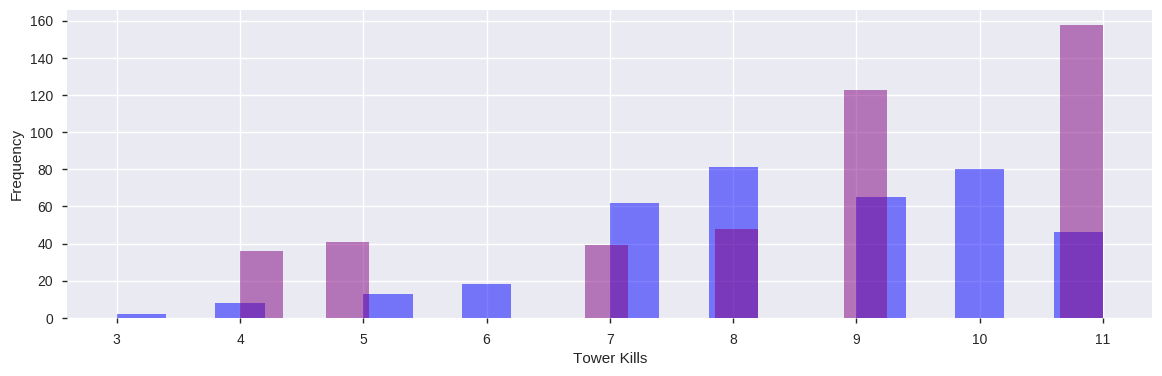

In [0]:
total_obj[total_obj['skill'] == 'Challenger']['tower_kills'].plot(kind='hist', bins = 20, alpha=0.5, figsize = (14, 4), color = 'blue')
total_obj[total_obj['skill'] == 'Low Elo']['tower_kills'].plot(kind='hist', bins = 20, alpha=0.5, figsize = (14, 4), color = 'purple')
plt.xlabel('Tower Kills')
plt.savefig('Tower_Kills.png');

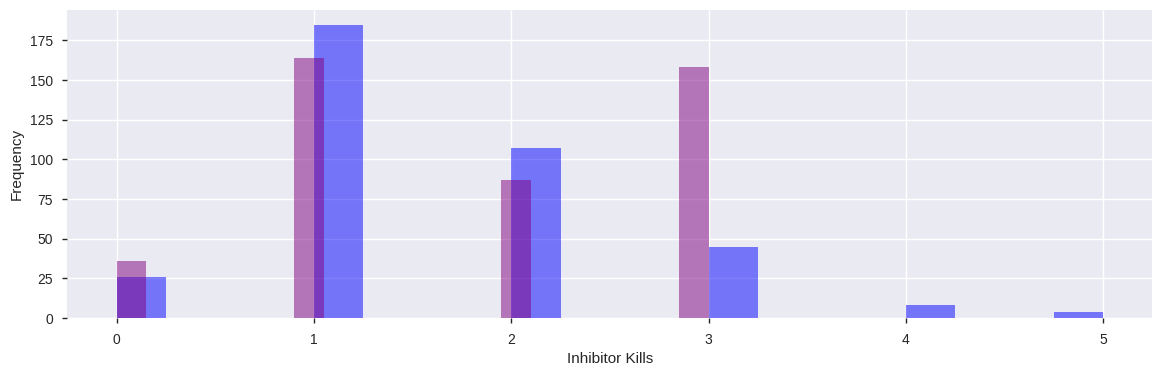

In [0]:
total_obj[total_obj['skill'] == 'Challenger']['inhib_kills'].plot(kind='hist', bins = 20, alpha=0.5, figsize = (14, 4), color = 'blue')
total_obj[total_obj['skill'] == 'Low Elo']['inhib_kills'].plot(kind='hist', bins = 20, alpha=0.5, figsize = (14, 4), color = 'purple')
plt.xlabel('Inhibitor Kills')
plt.savefig('Inhib_Kills.png');

In [0]:
from chart_studio.plotly import plot, iplot as py
import plotly.graph_objs as go

cp_data_plot = ['Total Gold', 'Total Kills', 'Total Assists', 'Total Deaths']

fig = go.Figure(data=[
    go.Bar(name='Challenger', x=cp_data_plot, y=[22.4364, 35.33, 34.93, 51.08, 23.13]),
    go.Bar(name='Low Elo', x=cp_data_plot, y=[20.7558, 34.93, 44.79, 19.43])
])
fig.update_layout(barmode='group')
fig.show()

In [0]:
obj_data_plot = ['Tower Kills', 'Inhib Kills', 'Baron Kills', 'Dragon Kills', 'Herald Kills']

fig = go.Figure(data=[
    go.Bar(name='Challenger', x=obj_data_plot, y=[8.49, 1.56, 0.86, 2.58, 0.76]),
    go.Bar(name='Low Elo', x=obj_data_plot, y=[8.65, 1.82, 0.64, 2.51, 0.56])
])
fig.update_layout(barmode='group')
fig.show()